**Pricing a Zero-copuon Bond option - Allia Simone 122438**



Sources:

$\cdot$ F.JAMSHIDIAN - An Exact Bond Option Formula (1989)

$\cdot$ J.HULL, A.WHITE - Pricing Interest-Rate-Derivative Securities (1990)

$\cdot$ M. HOUDA, J.ROUS, L.VOBORSKY - Interest Rate Derivative Valuation Securities Dependent on the Chosen Interest Rate Stochastic Process (2001)

$\cdot$ YONGWOONG LEE, KISUNG YANG - Finite Difference Method for the Hull–White Partial Differential Equations (2020)

**What is a Zero-coupon Bond, or Discount Bond, option?**

A **bond option** is an option contract in which the underlying asset is a bond. Like all standard option contracts, an investor can take many speculative positions through either bond call or bond put options. In general, all types of options, including bond options, are derivative products that allow investors to take speculative bets on the direction of underlying asset prices or to hedge certain asset risks within a portfolio.

An **european bond call option** is a contract that gives the holder the right to buy a bond by a particular date for a predetermined price. A secondary market buyer of a bond call option is expecting a decline in interest rates and an increase in bond prices. If interest rates decline, the investor may exercise his rights to buy the bonds. (Remember there is an inverse relationship between bond prices and interest rates—prices increase when interest rates decline and vice versa.)

An **european bond put option** is a contract that gives the holder the right to sell a bond by a particular date for a predetermined price. The buyer of a bond put option is expecting an increase in interest rates and a decrease in bond prices. A put option gives the buyer the right to sell a bond at the strike price of the contract.



**The Vasicek model**

To derive the price of a Bond Option, we must first determine the value of the underlying bond. To do that, we can use an interest-rate model, such as the Vasicek model, which gives an analytic solution for the price of a discount bond. Vasicek proposed a model for the risk-neutral process of the short rate $r$ that can be defined as follows:
$$
\text{d}r(t) = a(b - r(t)) \text{d}t + \sigma \text{d}z
$$
There are two volatility parameters,  $a$  and  $\sigma$. The parameter $\sigma$ determines the overall level of volatility; the reversion rate parameter $a$ determines the relative volatilities of long and short rates. A high value of $a$ causes short-term rate movements to damp out quicly, so long-term volatility is reduced. The probability distribution of all rates at all times is normal. 

This approach has of course some virtues on one side and some deficiencies on the other side. The greatest virtue is that this model comes with convenient explicit formula and that parameters can be chosen consistent with initial yield curve and initial volatility structure. Unfortunately, the choice of parameters is not unique. From among the deficiencies, we should bring out that the yield curve must be very smooth. There is a little reason for estimated parameters to remain constant: interest rate can become negative. 



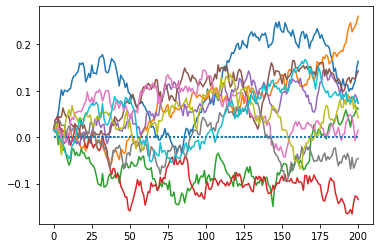

In [2]:
## Let's simulate interest rate path by the Vasicek model
import numpy as np

def vasicek(r0, a, b, sigma, T=1., N=10, seed=123):
    np.random.seed(seed)
    dt = T/float(N)
    rates = [r0]
    for i in range(N):
        dr = a *(b - rates[-1])*dt + sigma*np.random.normal()
        rates.append(rates[-1] + dr)
    return range(N+1), rates    


## Let's try our model 
import matplotlib.pyplot as plt

r0, a, b, sigma, T, N = 0.015, 0.02, 0.02, 0.012, 10., 200

## Simulate different paths for different seeds
for n in range(10):
    my_simulation = vasicek(r0, a, b, sigma, T, N,n)
    x,y = my_simulation
    plt.plot(x,y)
    plt.hlines(y = 0, xmin=min(x), xmax=max(x), linestyles =':')    

**Pricing a Zero-coupon Bond with the Vasicek model**

The price of a Zero-Coupon bond paying $1 at maturity T which can be determined with the Vasicek model is
$$
P(t,T) = A(t,T) e^{-B(t,T)r}
$$

where for $a\neq 0:$

$$
A(t,T) = \exp\left(\frac{1}{a^2}\left(B(t,T) - T + t\right)\left(a^2b - \frac{1}{2}\sigma^2\right) - \frac{1}{4a}\sigma^2B(t,T)^2\right)\\
B(t,T) = \frac{1 - e^{-a(T-t)}}{a}
$$

for $a = 0:$

$$
A(t,T) = \exp\left(\frac{1}{6} \ \left(\sigma^2 \cdot (T-t)^3\right)\right)\\
B(t,T) = T - t
$$

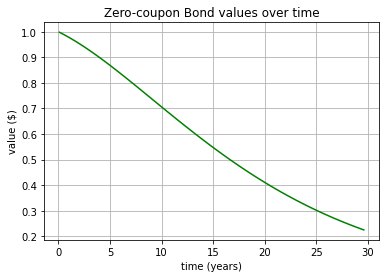

In [3]:
def discount_bond_Vas(b,a, sigma, tau,r0 =0.):
    import numpy as np

    if a == 0:
        B = tau
        A = np.exp((1/6)*(sigma**2)*(tau**3))
    else:
        B = (1 - np.exp(-a*tau)) / a
        A = np.exp((1/(a**2)) * (B - tau) * ((a**2)*b - 0.5*(sigma**2)) - (1/(4*a))*(sigma**2)*(B**2))
    
    return A, B, A*np.exp(-r0*B) 


Ts = np.r_[0.1:30:0.5]
b,a,sigma,r0 = 0.2,0.02,0.012,0.02
zcbs_Vas = [discount_bond_Vas(b,a,sigma,t,r0)[2] for t in Ts]

plt.plot(Ts, zcbs_Vas,"g-")
plt.title("Zero-coupon Bond values over time")
plt.ylabel("value ($)")
plt.xlabel("time (years)")
plt.grid()

**Term-structure definition with the Vasicek model**

For valuing IR derivative securities using the Vasicek model of the short rate $r$, the whole term structure for the model is needed. Denote $R(t,T)$ a continuously compounded interest rate at time $t$ for a term (maturity) of $T-t$. Then the value of appropriate discount bond is 
$$P(t,T) = e^{-R(t,T)(T-t)}$$
so that 
$$R(t,T) = - \frac{1}{T-t}\ln{P(t,T)}$$
Using the last equation with the previous $P(t,T)$ equation yields
$$R(t,T) = -\frac{1}{T-t}\ln A(t,T) + \frac{1}{T-t}B(t,T)r(t)$$
It shows that the entire term structure is defined as a function of $r(t)$ once $a,b$ and 
$\sigma$ have been chosen. The equation that defines $R(t,T)$ also shows that it is linearly dependent on $r(t)$. This means that the value of $r(t)$ determines the level of the term structure at thime t. The general shape of the term structure at time t is independent of $r(t)$ but does depend on t.

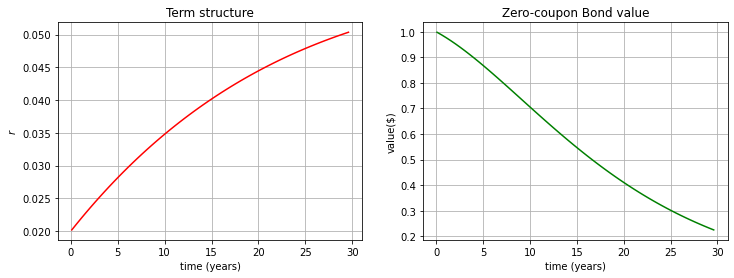

In [4]:
def term_str(b,a,sigma,tau,r0=0.):
    import numpy as np
    A = discount_bond_Vas(b,a,sigma,tau,r0)[0]
    B = discount_bond_Vas(b,a,sigma,tau,r0)[1]
    return -(1/tau)*np.log(A) + (1/tau)*B*r0
 

def app_discount_bond(b, a, sigma, tau, r0=0.):
    import numpy as np
    return np.exp(-term_str(b,a,sigma,tau,r0) * tau)


my_termstr = [term_str(b,a,sigma,T,r0) for T in Ts ]
app_discbond = [app_discount_bond(b,a,sigma,T,r0) for T in Ts ]


## Let's visualize the term-structure and the value of the bond over time
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

ax1.plot(Ts, my_termstr,'r')
ax1.set_title("Term structure")
ax1.set_ylabel("$r$")
ax1.set_xlabel("time (years)")
ax1.grid()

ax2.plot(Ts, app_discbond,'g')
ax2.set_title("Zero-coupon Bond value")
ax2.set_ylabel("value($)")
ax2.set_xlabel("time (years)")
ax2.grid()

**Pricing a Zero-coupon Bond with the Extended Vasicek Model**

Hull and White (*Pricing Interest-Rate-Derivative Securities (1990)*) proposed and "extension" of the Vasicek model, with the short rate determined as follows:
$$
\text{d}r(t) = [\theta(t) + a(b - r(t))] \text{d}t + \sigma \text{d}z
$$
where $\theta$ is a time-dependent drift. To simplify the model, we will assume that $\theta$ is constant over time, i.e., $\theta(t) = \theta$.
The method for pricing a zero-coupon bond is the same as Vasicek's model, with a small variation: in this case, we have that
$$A(t,T) = \exp\left(\frac{1}{a^2}\left(B(t,T) - T + t\right)\left(a\phi - \frac{1}{2}\sigma^2\right) - \frac{1}{4a}\sigma^2B(t,T)^2\right)$$
where 
$$\phi = ab + \theta - \lambda\sigma$$
Here, $\lambda$ is the market price of interest-rate risk. Actually, it is a time-dependent variable in the H-W model, but in our analysis we assume that it remains constant over time.

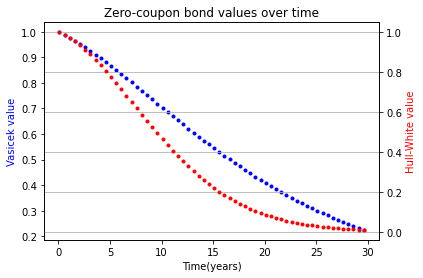

In [5]:
def discount_bond_HW(b,a,theta,lamb, sigma, tau,r0 =0.):
    import numpy as np
    B = (1 - np.exp(-a*(tau))) / a
    phi = a*b + theta - lamb*sigma
    A = np.exp( ((B -tau)*(a*phi - ((sigma**2)/2)))/(a**2) - ((sigma**2)*(B**2))/(4*a) )
    return A*np.exp(-B*r0)            

zcbs_HW = [discount_bond_HW(b,a,0.01,0.1,sigma,T,r0) for T in Ts]
y1 = zcbs_Vas
y2 = zcbs_HW
fig,ax1= plt.subplots()

ax1.plot(Ts, y1, 'b.')
ax1.set_xlabel('Time(years)')
ax1.set_ylabel('Vasicek value',color='b')

ax2 = ax1.twinx()
ax2.set_ylabel('Hull-White value',color ='r')
ax2.plot(Ts,y2,'r.')

plt.plot()
plt.title("Zero-coupon bond values over time")
#plt.ylabel("value ($)")
plt.xlabel("time (years)")
plt.grid()

**Testing the Hull-White model with the Finite Difference Method**

In this section, we will re-analize the Hull and White model, trying to find a numerical solution for our Bond Option pricing problem. Here, for the best fit of the model, we will change some condition that were taken in the previous analysis. 

As we said before, Hull and White extended the Vasicek’s model so that it has time-varying parameters fitting the yield curve observed in the market to satisfy the no-arbitrage condition. In the HW model described by Yongwoong Lee and Kisung Yang (*Finite Difference Method for the Hull–White Partial Differential Equations (2020)*), the stochastic dynamics of a short rate $r(t)$ is assumed to follow an Ornstein–Uhlenbeck process:
$$dr(t) = [\theta(t) - a r(t)]dt + \sigma dW(t)$$
with $r(0) = r_0$, and $dW(t)$ is a Wiener process. The function $\theta(t) = \frac{\partial f^M(0,t)}{\partial t} + af^M(0,t) + \frac{\sigma^2}{2a}(1 - e^{-2at})$ is chosen so that the model exactly replicates the current yield curve, where $f^M(0,T) = -\frac{\partial P^M(0,T)}{\partial T}$ and $P^M(0,T)$ is the current market discount factor for the maturity T. The current market discount factor for the maturity $T$ is defined as:
$$
P^M(0,T) = e^{-rT}
$$
The parameters $\sigma$ and $a$ define the volatility of the short rate in the future and the relative volatilities of long-term and short-term interest rates, respectively.

The extant literature uses two types of HW PDEs. One is the original PDE with respect to $(r(t),t)$. The other takes $x(t)$, the random component of $r(t)$, as the state variable from the following decomposition:
$$
r(t) = \alpha(t) + x(t)
$$
with $x(0)=0$, where $d\alpha(t)=[\theta(t) - a\alpha(t)]dt$ and $dx(t)=-ax(t)dt + \sigma dW(t)$. 
Now, let $u(x,t)$ be the value at time $t$ of a contingent claim on a single interest rate with $u(x,T) = \Phi(x)$. We consider the following HW PDE with respect to $x(t)$ and $t$:
$$
\frac{\partial u(x,t)}{\partial t} = ax \frac{\partial u(x,t)}{\partial x} - 0.5 \sigma^2 \frac{\partial^2 u(x,t)}{\partial x^2} + [\alpha(t) + x(t)]u(x,t)
$$

Now, let's define the payoff function of the European Bond Call Option with strike price $K$ and maturity $T$ ($T < S$, where $S$ is the Bond maturity) on  a generic bond
$$V(P(T,S)) = [P(T,S) - K]^+$$
Computing the value of a Bond with the HW formula, we get
$$
P(T,S) = A(T,S)e^{-B(T,S)[\alpha(T) + x(T)]}
$$
where
$$
A(T,S) = \dfrac{P^M(0,S)}{P^M(0,T)} e^{B(T,S)f^M(0,t) - \frac{\sigma^2}{4a}(1 - e^{-2at})B(T,S)^2}
$$
and
$$
B(T,S) = \frac{1}{a}[1 - e^{-a(S-T)}]
$$
Since $P(T,S)$ is a function of $x(t)$, we can rewrite
$$
\Phi(x) = [A(T,S)e^{-B(T,S)[\alpha(T) + x(T)]} - K]^+
$$


In [6]:
## Let's define every function
import numpy as np
import matplotlib.pyplot as plt
r0,a,sigma,alpha0 = 0.015,.02,0.012,0.03
T,N = 1,10


def P_M(r0,T):
    return  np.exp(-r0*T)

def f_M(r0,T):
    return - (-r0 * np.exp(-r0*T))

def ff_M(r0,T):
    return -r0 * f_M(r0,T)

def ftheta(a,sigma,r0,t):
    return ff_M(r0,t) + a*f_M(r0,t) + ((sigma**2) / (2*a)) * (1 - np.exp(-2*a*t))


def alpha(a,sigma,alpha0,r0,T=1,N=10):
    dt = T/float(N)
    my_alpha = [alpha0]
    for i in range(N):
        dalpha = (ftheta(a,sigma,r0,dt*i) - a*my_alpha[-1])*dt
        my_alpha.append(my_alpha[-1] + dalpha)
    return my_alpha    


def x_t(a,sigma,T=1,N=10,seed=23):
    np.random.seed(seed)
    dt = T/float(N)
    my_x = [0]
    for i in range(N):
        dx = -a*my_x[-1]*dt + sigma*np.random.normal()
        my_x.append(my_x[-1] + dx)
    return my_x    


def r_t(a,sigma,alpha0,r0,T=1,N=10,seed=23):
    np.random.seed(seed)
    rates = [r0]
    for i in range(N):
        at = alpha(a,sigma,alpha0,r0,T,N)[i]
        xt = x_t(a,sigma,T,N)[i]
        rt = at + xt
        rates.append(rt)
    return rates   

def bond_pr(a,sigma,alpha0,r0,T,S,N,xt,seed=23):
    import numpy as np
    np.random.seed(seed)
    
    def B_TS(a,T,S):
        return (1/a) * (1 - np.exp(-a*(S-T)))
    
    def A_TS(a,T,S,sigma,r0):
        return (P_M(r0,S)/P_M(r0,T)) * (np.exp(B_TS(a,T,S)*f_M(r0,T) - (sigma**2/(4*a))*(1 - np.exp(-2*a*T))*(B_TS(a,T,S)**2)))
    
    return A_TS(a,T,S,sigma,r0) * np.exp(-B_TS(a,T,S) * (alpha(a,sigma,alpha0,r0,N)[T] + xt))

Now let's solve the Hull-White PDE for an European Bond Call option:
$$
\frac{\partial u(x,t)}{\partial t} - ax \frac{\partial u(x,t)}{\partial x} + \frac{1}{2}\sigma^2 \frac{\partial^2 u(x,t)}{\partial x^2} = [\alpha + x]u(x,t)
$$
with $u(x,T) = \Phi(x) = \max[A(T,S)e^{-B(T,S)[\alpha + i\Delta x]} - K, 0]$.

To solve a PDE, we must set up a discrete grid. In this case, with respect to time $t$ and  $x(t)$, that is, point $(x,t)$ where
$$
x \in \{0, \Delta x, 2\Delta x, \dots, M \Delta x \equiv x_{max}\}, \\
t \in \{0, \Delta t, 2 \Delta t, \dots, N \Delta t \equiv S\},
$$
where $T$ is the maturity and $x_{max}$ is a "large" random component that cannot be reached by $x(t)$ in the considered time horizon. 

We will also use the notation
$$
u_{i,j} = u(i \Delta x, j \Delta t).
$$

If we discretize the derivatives ($\partial/\partial t$ with backward difference, $\partial/\partial x$ with central difference) we obtain 
$$
\frac{u_{i,j} - u_{i,j-1}}{\Delta t} -a i \Delta x \frac{u_{i+1,j} - u_{i-1,j}}{2 \Delta x} + \frac{1}{2}\sigma^2 \frac{u_{i+1,j} - 2 u_{i,j} + u_{i-1,j}}{\Delta x^2} = [\alpha + i\Delta x]u_{i,j}\qquad\forall\, i,j
$$
together with the boundary conditions ($S$ = Bond maturity, $T$ = option maturity)
$$
\begin{aligned}
& u_{i,T} = \max[A(T,S)e^{-B(T,S)[\alpha + i\Delta x]} - K, 0], \quad i=0,1,\dots, M \\
& u_{0,j} = e^{-r_0(S-j)\Delta t}\max[A(j,S)e^{-B(j,S)[\alpha + x_0]} - K, 0], \quad j = 0, 1, \dots, S \\
& u_{M,j} = e^{-r_0(S-j)\Delta t}\max[A(j,S)e^{-B(j,S)[\alpha + x_M]} - K, 0], \quad j = 0, 1, \dots, S.
\end{aligned}
$$

We have defined the terminal conditions, then we will solve the PDE backward in time. That is, from $j=T$ and $u_{i,T}$ from the boundary conditions, one obtains $u_{i,T-1}$ from the equations above as a function of 3 known quantities, and so on.
$$
\begin{aligned}
u_{i,j-1} 
& = \underbrace{[\frac{\Delta t}{2}(ai + \frac{\sigma^2}{\Delta x^2})]}_{=: a_i} u_{i-1,j} + \underbrace{[1 - \Delta t(\alpha +i\Delta x) - (\frac{\sigma^2 \Delta t}{\Delta x ^2})]}_{=: b_i} u_{i,j} + \underbrace{[\frac{\Delta t}{2} (\frac{\sigma^2}{\Delta x^2} - ai)]}_{=: c_i} u_{i+1,j} \\
& = a_i u_{i-1,j} + b_i u_{i,j} + c_i u_{i+1,j},\\
\end{aligned}
$$

for $i=1,2,\dots, M-1$ and $j=N-1, N-2, \dots, 1,0$.
$$
i = 1, 2, \dots, M-1 \\
j = N, N-1, \dots, 1
$$

Finally, let's implement this scheme!

In [7]:
# Set the parameters
x0, K1, T1, S, xmax = 0.002, 0.7, 1, 3, 0.1
dx, dt = 0.01, 0.5
M = round(xmax/dx)
N = round(S/dt)

# Set up grid
optval = np.zeros((M+1,N+1))
vetx = np.linspace(0,xmax,M+1)
veti = np.arange(0,M+1)
vetj = np.arange(0,N+1)

# Set up terminal condition
optval[:, -1] = np.maximum([bond_pr(a,sigma,alpha0,r0,T1,S,10,x) - K1  for x in vetx],0)

# Set up boundary conditions
optval[1,:] = np.exp(-r0*dt*(S - vetj)) * np.maximum([bond_pr(a,sigma,alpha0,r0,j,S,10,x0) - K1 for j in vetj],0)
optval[-1,:] = np.exp(-r0*dt*(S - vetj)) * np.maximum([bond_pr(a,sigma,alpha0,r0,j,S,10,xmax) - K1 for j in vetj],0)


# Set up  a, b and c
coeff_a = (dt/2) * (a*veti + ((sigma**2)/(dx**2)))
coeff_b = 1 - dt*(alpha0 + veti*dx) - (((sigma**2) * dt)/(dx**2))
coeff_c = (dt/2)* ( ((sigma**2)/(dx**2)) - a*veti )

# Solve backward in time
for j in range(N-1,-1,-1):
    for i in range(2,M):
        optval[i,j] = coeff_a[i]*optval[i-1,j+1] + coeff_b[i]*optval[i,j+1] + coeff_c[i]*optval[i+1,j+1]


# return price, given the underlying factor x0, by interpolation
np.interp(x0, vetx,optval[:,0])        

0.041031839369063905

**Valuing a Bond Option with a closed-form formula (Vasicek Model)**

To value an interest rate derivative with a closed form solution, especially a bond call/put option, we refer to FARSHID JAMSHIDIAN's paper, "An Exact Bond Option Formula." Jamshidian paper is based on the Vasicek model for the term-structure determination. Here we have some sketch of the proof.


The price $U(r,t)$ of a security paying continuously at a rate $h(r,t)$ and yielding a terminal payoff $g(r_T)$ at time $T$ is the solution of

$$
U_t + \frac{1}{2}(\sigma^2)'U_{rr} + a(\bar{r} - r)U_r - rU + h = 0 \\
U(r,T) = g(r)
$$

Let $P(r,t,s)$ denote the price at time $t$, given that $r(t) = r$,of a Zero-coupon Bond maturing at a time $s$. Then, we set
$$ v^2(t, s) = \operatorname{var}_{r,t}[r(s)] = \frac{\sigma^2}{2a}(1 - e^{-2a(s-t)})$$

Under the above assumptions, the solution of the PDE is given by
$$U(r,t) =P(r,t,T)E[g(R_{r,t,T})] + \int_{t}^{T} P(r, t, s) E[h(R_{r,t,s}, s)] ds$$
where $R_{r,t,s}$ denotes a normal random variable with mean $P(t,s)/P(t,T)$ and variance $v^2(t,s)$ and $g(r) = P(r,T,s)$. Moreover
$$\tilde{P} = P(R_{r,t,T},T,s)$$ 
The previous equation entails that the price at time $t$ of a call option  on the $s$-maturity Zero-coupon Bond with exercise price X and expiration $T < s$ is given by
$$C(r,t,T,s,X) = P(r,t,T)E[max(0,\tilde{P} - K)]$$ 
Moreover, $\tilde{P}$ is log-normal with 
$$var[log\tilde{P}] = var_{r,t}[logP(r(T),T,s)] = \sigma_p^2$$
where
$$\sigma_p = v(t,T)\frac{1 - e^{-a(s-T)}}{a}$$

Hence
$$C(r,t,T,s,X) = P(r,t,s)N(h) - XP(r,t,T)N(h - \sigma_p)$$
where 
$$h = \dfrac{1}{\sigma_p} \ln\left(\dfrac{P(r,t,s)}{XP(r,t,T)}\right) + \dfrac{\sigma_p}{2}$$
In this case, we have considered a Bond paying 1 at maturity, but for a generic principal L the value of the call option is
$$C(r,t,T,s,L,X) = LP(r,t,s)N(h) - XP(r,t,T)N(h - \sigma_p)$$
and $h$ becomes
$$h = \dfrac{1}{\sigma_p} \ln\left(\dfrac{LP(r,t,s)}{XP(r,t,T)}\right) + \dfrac{\sigma_p}{2}$$

By the put-call parity, we can define the value of a put option as follows:
$$P(r,t,T,s,L,X) = X P(r,t,T)N(-h + \sigma_p) - L P(r,t,s)N(-h)$$

In [10]:
## Let's implement the pricing formula for a bond option

def bond_option_vas(b,a,sigma,tau_tT,tau_ts,L,X,r0,kind="call"):
    import numpy as np
    from scipy.stats import norm
    if tau_ts < tau_tT:
        print("Error: tau_ts(=s-t) must be greather than tau_tT(=T-t)")
    else:    
        P_ts = discount_bond_Vas(b,a,sigma,tau_ts,r0)[2]
        P_tT = discount_bond_Vas(b,a,sigma,tau_tT,r0)[2]
        v = np.sqrt( ((sigma**2)/(2*a)) * ((1 - np.exp(-2*a*tau_tT))) )
        sigma_p = v * ((1/a) * (1 - np.exp(-a * (tau_ts - tau_tT)))) 
        h = (1/sigma_p) * np.log((L*P_ts) / (X*P_tT)) + sigma_p/2

    if kind == "put":    
        return X*P_tT*norm.cdf(-(h - sigma_p)) - L*P_ts*norm.cdf(-h) 
    else:
        return L*P_ts*norm.cdf(h) - X*P_tT*norm.cdf(h - sigma_p)
       

## Try our function
tau_tT,tau_ts,L,X = 1,3,1,0.7        
bond_option_vas(b,a,sigma,tau_tT,tau_ts,L,X,r0)

0.25277482984923905

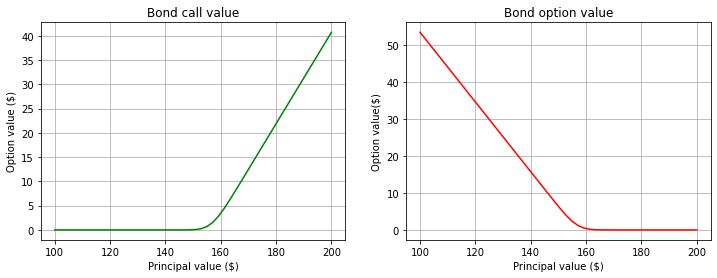

In [23]:
# Value of the option as Bond principal changes
bond_principal = np.linspace(100,200,50)
call_val_Vas = [bond_option_vas(b,a,sigma,tau_tT,tau_ts,s,150,r0) for s in bond_principal]
put_val_Vas = [bond_option_vas(b,a,sigma,tau_tT,tau_ts,s,150,r0,"put") for s in bond_principal]

fig, (ax_01, ax_02) = plt.subplots(ncols=2, figsize=(12, 4))

ax_01.plot(bond_principal,call_val_Vas,'g')
ax_01.set_title("Bond call value")
ax_01.set_ylabel("Option value ($)")
ax_01.set_xlabel("Principal value ($)")
ax_01.grid()

ax_02.plot(bond_principal,put_val_Vas,'r')
ax_02.set_title("Bond option value")
ax_02.set_ylabel("Option value($)")
ax_02.set_xlabel("Principal value ($)")
ax_02.grid()

**Valuing a Bond option with a closed form formula (Hull-White model)**

The valuation of a Bond option with the H-W model does not change: it follows Jamshidian model. Of course, what actually change is only the Zero-coupon bond value. 

In [24]:
def bond_option_HW(b, a,theta ,lamb, sigma, tau_tT, tau_ts, L, X, r0,kind="call"):
    import numpy as np
    from scipy.stats import norm
    if tau_ts < tau_tT:
        print("Error: tau_ts(=s-t) must be greather than tau_tT(=T-t)")
    else:
        p_ts = discount_bond_HW(b,a,theta,lamb, sigma, tau_ts,r0)  
        p_tT = discount_bond_HW(b,a,theta,lamb, sigma, tau_tT,r0)
        v = np.sqrt( ((sigma**2)/(2*a)) * ((1 - np.exp(-2*a*(tau_ts - tau_tT)))) )
        sigma_p = v * ((1 - np.exp(-a*tau_tT)) / a)
        h = (1/sigma_p)*np.log((L*p_ts)/(X*p_tT)) + sigma_p/2

    if kind == "put":   
        return X*p_tT*norm.cdf(-(h - sigma_p)) - L*p_ts*norm.cdf(-h)     
    else:
        return L*p_ts*norm.cdf(h) - X*p_tT*norm.cdf(h - sigma_p)  
    

## Try our function 
theta,lamb = 0.018,0.15
bond_option_HW(b, a,theta ,lamb, sigma, tau_tT, tau_ts, L, X, r0)   

0.19338333245976635

**Comparison between Vasicek and Hull-White options' values**

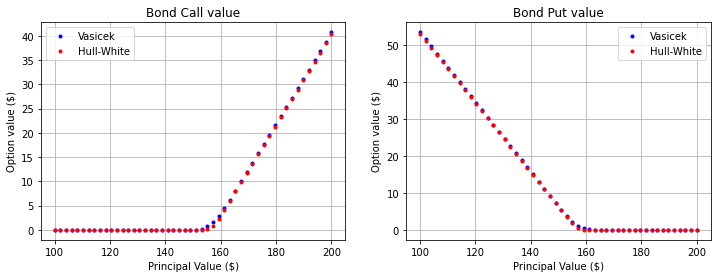

In [25]:
## With respect to the Bond principal
call_val_HW = [bond_option_HW(b,a,theta,lamb,sigma,1,2,s,150,r0) for s in bond_principal]
put_val_HW = [bond_option_HW(b,a,theta,lamb,sigma,1,2,s,150,r0,"put") for s in bond_principal]

fig, axs = plt.subplots(1,2, figsize=(12, 4))

axs[0].plot(bond_principal, call_val_Vas,'b.',label="Vasicek")
axs[0].plot(bond_principal,call_val_HW,'r.',label="Hull-White")
axs[0].set_xlabel("Principal Value ($)")
axs[0].set_ylabel("Option value ($)")
axs[0].set_title("Bond Call value")
axs[0].legend()
axs[0].grid()

axs[1].plot(bond_principal, put_val_Vas,'b.',label="Vasicek")
axs[1].plot(bond_principal,put_val_HW,'r.',label="Hull-White")
axs[1].set_xlabel("Principal Value ($)")
axs[1].set_ylabel("Option value ($)")
axs[1].set_title("Bond Put value")
axs[1].legend()
axs[1].grid()

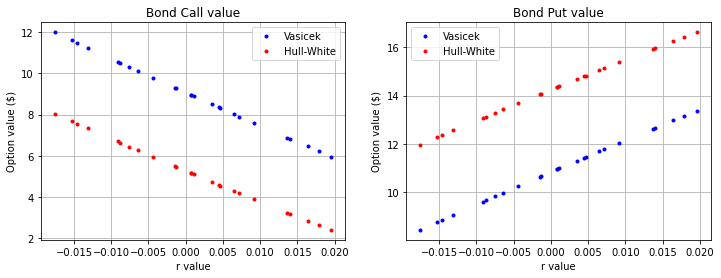

In [26]:
## Whit respect to the initial rate r0
import random
initial_rate = [random.uniform(-0.02,0.02) for _ in range(25)]

call_val_Vas1  = [bond_option_vas(b,a,sigma,1,2,160,150,r) for r in initial_rate]
call_val_HW1  = [bond_option_HW(b,a,theta,lamb,sigma,1,2,160,150,r) for r in initial_rate]

put_val_Vas1 = [bond_option_vas(b,a,sigma,1,2,150,160,r,"put") for r in initial_rate]
put_val_HW1  = [bond_option_HW(b,a,theta,lamb,sigma,1,2,150,160,r,"put") for r in initial_rate]

fig, axs = plt.subplots(1,2, figsize=(12, 4))

axs[0].plot(initial_rate, call_val_Vas1,'b.',label="Vasicek")
axs[0].plot(initial_rate,call_val_HW1,'r.',label="Hull-White")
axs[0].set_xlabel("r value")
axs[0].set_ylabel("Option value ($)")
axs[0].set_title("Bond Call value")
axs[0].legend()
axs[0].grid()

axs[1].plot(initial_rate, put_val_Vas1,'b.',label="Vasicek")
axs[1].plot(initial_rate,put_val_HW1,'r.',label="Hull-White")
axs[1].set_xlabel("r value")
axs[1].set_ylabel("Option value ($)")
axs[1].set_title("Bond Put value")
axs[1].legend()
axs[1].grid()

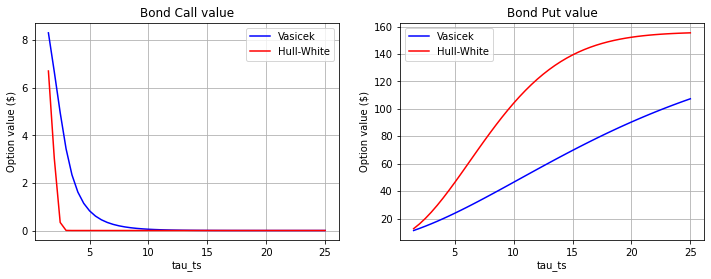

In [27]:
## Whit respect to the "tau_ts" maturity
Ts1 = np.r_[1.5:25.5:0.5]

call_val_Vas2  = [bond_option_vas(b,a,sigma,1,t,160,150,r0) for t in Ts1]
call_val_HW2  = [bond_option_HW(b,a,theta,lamb,sigma,1,t,160,150,r0) for t in Ts1]

put_val_Vas2 = [bond_option_vas(b,a,sigma,1,t,150,160,r0,"put") for t in Ts1]
put_val_HW2 = [bond_option_HW(b,a,theta,lamb,sigma,1,t,150,160,r0,"put") for t in Ts1]

fig, axs = plt.subplots(1,2, figsize=(12, 4))

axs[0].plot(Ts1, call_val_Vas2,'b-',label="Vasicek")
axs[0].plot(Ts1,call_val_HW2,'r-',label="Hull-White")
axs[0].set_xlabel("tau_ts")
axs[0].set_ylabel("Option value ($)")
axs[0].set_title("Bond Call value")
axs[0].legend()
axs[0].grid()

axs[1].plot(Ts1, put_val_Vas2,'b-',label="Vasicek")
axs[1].plot(Ts1,put_val_HW2,'r-',label="Hull-White")
axs[1].set_xlabel("tau_ts")
axs[1].set_ylabel("Option value ($)")
axs[1].set_title("Bond Put value")
axs[1].legend()
axs[1].grid()

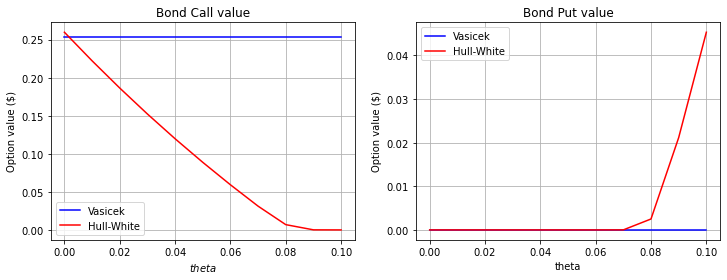

In [28]:
## With respect to "theta"
list_of_theta = np.r_[0:0.11:0.01]

call_val_Vas3 = [bond_option_vas(b,a,sigma,tau_tT,tau_ts,L,X,r0) for t in list_of_theta] 
call_val_HW3 = [bond_option_HW(b,a,t,lamb,sigma,tau_tT,tau_ts,L,X,r0) for t in list_of_theta]

put_val_Vas3 = [bond_option_vas(b,a,sigma,tau_tT,tau_ts,L,X,r0,"put") for t in list_of_theta] 
put_val_HW3 = [bond_option_HW(b,a,t,lamb,sigma,tau_tT,tau_ts,L,X,r0,"put") for t in list_of_theta]

fig, axs = plt.subplots(1,2, figsize=(12, 4))

axs[0].plot(list_of_theta, call_val_Vas3,'b-',label="Vasicek")
axs[0].plot(list_of_theta,call_val_HW3,'r-',label="Hull-White")
axs[0].set_xlabel("$theta$")
axs[0].set_ylabel("Option value ($)")
axs[0].set_title("Bond Call value")
axs[0].legend()
axs[0].grid()

axs[1].plot(list_of_theta, put_val_Vas3,'b-',label="Vasicek")
axs[1].plot(list_of_theta,put_val_HW3,'r-',label="Hull-White")
axs[1].set_xlabel("theta")
axs[1].set_ylabel("Option value ($)")
axs[1].set_title("Bond Put value")
axs[1].legend()
axs[1].grid()

**Conclusion**

We have seen how a European Bond Option can be priced with both open and closed models. In our analysis, we can observe similar results for the Vasicek and Hull-White (closed form) models, but they differ from the Hull-White model implemented with the finite difference method. We can expect this result from the fact that the conditions on the parameters are different. For example, in the closed-form formula we assume that all parameters are constant. Instead, with FDM we try to implement time-dependent variables, which leads to reality-like results.